In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
tr_err = pd.read_csv("train_err_data.csv")
print("data size :", tr_err.shape)
tr_err.head(10)

data size : (16554663, 6)


,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
5,10000,20201101050516,model_3,05.15.2138,26,1
6,10000,20201101050522,model_3,05.15.2138,4,0
7,10000,20201101060903,model_3,05.15.2138,15,1
8,10000,20201101174754,model_3,05.15.2138,16,1
9,10000,20201101174756,model_3,05.15.2138,4,0


In [5]:
tr_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [6]:
tr_quality = pd.read_csv("train_quality_data.csv")
print("data size :", tr_quality.shape)
tr_quality.head(10)

data size : (828624, 16)


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
5,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
6,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,4,0,0,0,0,4,0,0
7,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
8,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
9,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [7]:
tr_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


In [8]:
tr_problem = pd.read_csv("train_problem_data.csv")
print("data size :", tr_problem.shape)
tr_problem.head(10)

data size : (5429, 2)


,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
5,16852,20201119150000
6,23427,20201121110000
7,13507,20201111160000
8,11274,20201118120000
9,20610,20201127230000


<AxesSubplot:>

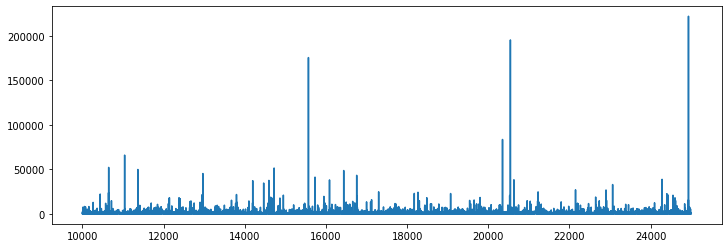

In [9]:
# 각 user_id의 에러 발생 횟수 범위
plt.figure(figsize = (12, 4))
tr_err['user_id'].value_counts().sort_index().plot()

In [10]:
# 고유한 fwver
print(sorted(tr_err['fwver'].unique()))
print('fwver 개수 :', len(tr_err['fwver'].unique()))

['03.11.1141', '03.11.1149', '03.11.1167', '04.16.2641', '04.16.3345', '04.16.3439', '04.16.3553', '04.16.3569', '04.16.3571', '04.22.1442', '04.22.1656', '04.22.1666', '04.22.1684', '04.22.1750', '04.22.1778', '04.33.1095', '04.33.1125', '04.33.1149', '04.33.1171', '04.33.1185', '04.33.1261', '04.73.2237', '04.73.2571', '04.82.1684', '04.82.1730', '04.82.1778', '05.15.2090', '05.15.2092', '05.15.2114', '05.15.2120', '05.15.2122', '05.15.2138', '05.15.3104', '05.66.3237', '05.66.3571', '10', '8.5.3']
fwver 개수 : 37


In [11]:
# 고유한 errtype
print(sorted(tr_err['errtype'].unique()))
print('errtype 개수 :', len(tr_err['errtype'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
errtype 개수 : 41


In [12]:
# 고유한 errcode
print(tr_err['errcode'].unique())
print('errcode 개수 :', len(tr_err['errcode'].unique()))

['1' '0' '2' ... '4526' '3965' '25999']
errcode 개수 : 2806


In [13]:
# 고유한 model_nm
print(sorted(tr_err['model_nm'].unique()))
print('model_nm 개수 :', len(tr_err['model_nm'].unique()))

['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8']
model_nm 개수 : 9


In [14]:
temp = tr_err.copy()

In [15]:
temp = pd.get_dummies(data = temp, columns = ['model_nm'])

In [16]:
temp.head()

,user_id,time,fwver,errtype,errcode,model_nm_model_0,model_nm_model_1,model_nm_model_2,model_nm_model_3,model_nm_model_4,model_nm_model_5,model_nm_model_6,model_nm_model_7,model_nm_model_8
0,10000,20201101025616,05.15.2138,15,1,0,0,0,1,0,0,0,0,0
1,10000,20201101030309,05.15.2138,12,1,0,0,0,1,0,0,0,0,0
2,10000,20201101030309,05.15.2138,11,1,0,0,0,1,0,0,0,0,0
3,10000,20201101050514,05.15.2138,16,1,0,0,0,1,0,0,0,0,0
4,10000,20201101050515,05.15.2138,4,0,0,0,0,1,0,0,0,0,0


In [17]:
tr_err = temp

In [18]:
tr_err['errtype'].value_counts()

23    2276515
31    1985294
22    1865361
15    1604951
4     1296750
16    1249376
32    1130564
5      952920
40     730378
28     544306
27     540804
26     536401
12     320181
11     307030
14     252015
33     178477
34     165536
10     133403
41     104138
7       51993
6       50482
17      46009
24      39071
42      34374
3       30758
2       26106
13      22843
1       21545
39      15820
35      10187
37       9336
36       9317
38       4539
18       2671
20       2080
25       1184
19        664
21        607
30        402
8         166
9         109
Name: errtype, dtype: int64

In [19]:
# 고유한 quality_0
print(tr_quality['quality_0'].unique())
print('quality_0 개수 :', len(tr_quality['quality_0'].unique()))

[ 0.00000e+00  2.00000e+00 -1.00000e+00          nan  1.00000e+00
  3.00000e+00  7.00000e+00  6.00000e+00  4.08800e+03  1.29000e+02
  3.18600e+03  2.96000e+02  1.70000e+01  6.30000e+01  1.00000e+01
  9.04000e+02  4.00000e+00  3.79000e+03  1.62180e+04  1.06280e+04
  1.04000e+02  7.80000e+01  3.79000e+02  3.46000e+02  2.15000e+02
  2.61000e+02  3.34000e+02  2.50000e+02  1.60000e+01  3.10000e+01
  8.70000e+01  2.98000e+02  1.50000e+01  7.70000e+01  1.87140e+04
  7.42200e+03  6.50000e+01  1.40000e+01  3.30000e+01  1.66000e+02
  1.94000e+02  1.12000e+02  1.26000e+02  5.23000e+02  1.30000e+01
  9.40000e+01  1.10000e+01  4.25000e+02  3.20000e+01  5.00000e+00
  1.98700e+03  1.27270e+04  5.20000e+01  2.14000e+02  1.69000e+02
  2.03000e+02  1.70000e+02  1.31000e+02  1.14000e+02  1.13000e+02
  6.10000e+01  2.24000e+02  1.84000e+02  6.90000e+01  5.10000e+01
  7.20000e+01  9.00000e+01  9.10000e+01  1.19000e+02  2.44000e+02
  2.09000e+02  1.97000e+02  4.99000e+02  4.37000e+02  4.14000e+02
  2.94000e

In [20]:
tr_quality['quality_0'].fillna(0, inplace = True)
tr_quality.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [21]:
tr_quality.isnull().sum()

time              0
user_id           0
fwver         40080
quality_0         0
quality_1         0
quality_2     40113
quality_3         0
quality_4         0
quality_5        20
quality_6         0
quality_7         0
quality_8         0
quality_9         0
quality_10        0
quality_11        0
quality_12        0
dtype: int64

In [31]:
tr_quality['quality_0'] = tr_quality['quality_0'].astype('float').dtypes

In [23]:
# 고유한 quality_2
print(tr_quality['quality_2'].unique())
print('quality_2 개수 :', len(tr_quality['quality_2'].unique()))

[ 0.00000e+00  1.00000e+00 -1.00000e+00  2.00000e+00  1.30000e+01
  3.00000e+00  7.00000e+00  6.00000e+00  8.10000e+01  6.40000e+01
  3.60000e+01  1.80000e+01  4.00000e+00  2.50000e+01  4.00000e+01
  8.00000e+00  6.60000e+01  1.60000e+01  2.10000e+01  5.40000e+01
  3.70000e+01  1.10000e+01  1.10000e+02  1.24000e+02  8.50000e+01
  2.40000e+01  2.00000e+01  1.50000e+01  9.00000e+00  1.00000e+01
  2.30000e+01  5.20000e+01  4.40000e+01  2.20000e+01  4.35000e+02
  1.20000e+01  3.00000e+01  5.00000e+00  5.59000e+02  2.70000e+01
  1.70000e+01  1.90000e+01  1.30000e+02  1.13000e+02  1.13626e+05
  9.85000e+02  1.21000e+02  1.92600e+03  2.90000e+01  1.23485e+05
  1.91859e+05  5.06000e+02  1.59000e+02  7.90000e+01  4.80000e+01
  4.08800e+03  1.29000e+02  3.18600e+03  2.96000e+02  6.30000e+01
  9.04000e+02          nan  1.62000e+02  2.54000e+02  8.99000e+02
  3.00000e+02  3.79000e+03  1.62180e+04  1.06280e+04  1.04000e+02
  7.80000e+01  3.79000e+02  3.46000e+02  2.15000e+02  2.61000e+02
  3.34000e

In [30]:
tr_quality['quality_2'].fillna(0, inplace = True)
tr_quality['quality_2'] = tr_quality['quality_2'].astype('float').dtypes
tr_quality.isnull().sum()

time              0
user_id           0
fwver         40080
quality_0         0
quality_1         0
quality_2         0
quality_3         0
quality_4         0
quality_5         0
quality_6         0
quality_7         0
quality_8         0
quality_9         0
quality_10        0
quality_11        0
quality_12        0
dtype: int64

In [25]:
# 고유한 quality_5
print(tr_quality['quality_5'].unique())
print('quality_5 개수 :', len(tr_quality['quality_5'].unique()))

['0' '4' '8' ... '98,175' '7,998' '9,558']
quality_5 개수 : 4745


In [35]:
tr_quality['quality_5'].fillna(0, inplace = True)
tr_quality.isnull().sum()

time              0
user_id           0
fwver         40080
quality_0         0
quality_1         0
quality_2         0
quality_3         0
quality_4         0
quality_5         0
quality_6         0
quality_7         0
quality_8         0
quality_9         0
quality_10        0
quality_11        0
quality_12        0
dtype: int64

In [37]:
tr_quality['quality_5'] = tr_quality['quality_5'].str.replace(',', '').astype('float').dtypes

In [38]:
tr_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        828624 non-null  int64 
 1   user_id     828624 non-null  int64 
 2   fwver       788544 non-null  object
 3   quality_0   828624 non-null  object
 4   quality_1   828624 non-null  int64 
 5   quality_2   828624 non-null  object
 6   quality_3   828624 non-null  int64 
 7   quality_4   828624 non-null  int64 
 8   quality_5   828624 non-null  object
 9   quality_6   828624 non-null  int64 
 10  quality_7   828624 non-null  object
 11  quality_8   828624 non-null  object
 12  quality_9   828624 non-null  object
 13  quality_10  828624 non-null  object
 14  quality_11  828624 non-null  int64 
 15  quality_12  828624 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 101.2+ MB
